<a href="https://colab.research.google.com/github/anmolgulati10/Urban-sound-classification/blob/master/soundclassification11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install librosa

In [0]:
pip install ipython

In [0]:
!apt-get install ffmpeg #backend for librosa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
#dataset downloaded
!wget -c https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz -O - | sudo tar -xz

--2019-08-22 13:48:58--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>]   5.61G  9.76MB/s    in 9m 46s  

2019-08-22 13:58:46 (9.80 MB/s) - written to stdout [6023741708/6023741708]



In [0]:
import os
import pandas as pd
import librosa
import numpy as np
import librosa.effects
import librosa.display
from tqdm import tqdm

In [0]:
data=pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')

In [0]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
#preprocessing
x_train = []
x_test = []
y_train = []
y_test = []
max_pad_len = 174
for i in tqdm(range(len(data))):
    y, sr = librosa.load(f"UrbanSound8K/audio/fold{data.fold[i]}/{data.slice_file_name[i]}")
    
    melspectrogram = librosa.feature.melspectrogram(y= y, sr= sr, n_mels= 128,fmax= 8000)
    feature = librosa.power_to_db(melspectrogram, ref= np.max)
    pad_width = max_pad_len - feature.shape[1]
    feature = np.pad(feature, pad_width= ((0, 0), (0, pad_width)), mode= 'constant')

    x_train.append(feature)
    y_train.append(data.classID[i])
    

100%|██████████| 8732/8732 [1:06:54<00:00,  1.97it/s]


In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8732, 128, 174), (0,), (8732,), (0,))

In [0]:
y_train[:10]

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [0]:
#reshaping into 2d to save in csv format
x_train_2d = np.reshape(x_train, (8732, 128*174))
x_train_2d.shape

(8732, 22272)

In [0]:
# saving training and testing csv files
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

W0822 15:36:50.343839 140493044410240 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

title: DATASET, id: 13BKqqXxutcXpv88Mxi9X8zrhRQiM-7hs
title: dhara, id: 1SmkZ9gHVIEvLlt_l5ox_3_RFVd2IcMuqcxAa6VAcLHY
title: IMAGE CLUSTERING (1).pdf, id: 16V8f7Pr1WFwGhqMJHVneWg0tkbPA_Pg1
title: IMAGE CLUSTERING 3, id: 1g9khpSaEDxs0e8k4fiU2feyz4MVCFXf8kGoiwXTsqdc
title: House price report.pdf, id: 1R0z2AW7vpbh7KEst3Bp_6Qf7vVWcZDxq
title: report AITS.pdf, id: 1V3LvxAUcOuFgwCs3Ud7luG7wqjeU_jI9
title: Conference-template-A4 (2), id: 1yzyaXOsjyJPrVRZ-dzEBTXxzVoteBjcUabxvkf_uzJU
title: Conference-template-A4 (2), id: 1MTtLJBPQ97BkiVdbrX9zHHK5vLAV9FSFuxPbOIoZqFM
title: Conference-template-A4, id: 1QI6_XALn0nJuCsrYzD2aU5lIzFY2Y2CxxOmdBXUst7s
title: springer.pdf, id: 1srlBmR1PTS9UTdyWrc2SPJTg8R2zAunl
title: springer, id: 1CzpVMx9UGkh2WuS8ReYH7-1OURuVxPC9KXIRVYZJwWw
title: Medicine Classification using Machine Learning Techniques, id: 1FUxpHQYAJA_OVLpb-A5WV8PqOIxWLkCXirTMzzZodw0
title: article, id: 1qcYAtbkpJqCuci3owFgwUsxHOpBQPjh3bT6NyeZDJwA
title: springer1 (1), id: 12mBGG4p6N7Z3KeDxiXqHvF3RW

In [0]:
file = drive.CreateFile({'parents':[{u'id': '13BKqqXxutcXpv88Mxi9X8zrhRQiM-7hs'}]}) 
file.SetContentFile('/content/train_labels.csv')
file.Upload()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
X=pd.read_csv('/content/drive/My Drive/DATASET/ content train_data.csv')
Y=pd.read_csv('/content/drive/My Drive/DATASET/ content train_labels.csv')

In [0]:
x_train=np.array(X)
y_train=np.array(Y)

In [0]:
x_train.shape,y_train.shape

((8731, 22272), (8731, 1))

In [0]:
x_train1=np.array([x.reshape(128,174,1) for x in x_train ])

In [0]:
x_train1.shape

(8731, 128, 174, 1)

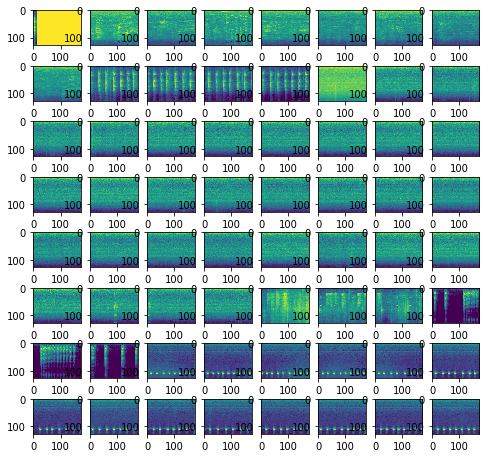

In [0]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(x_train[i]/255)
plt.show()

In [0]:
def create_model():
  from keras.models import Sequential
  model=Sequential()
  from keras.layers import Dropout,Conv2D,MaxPooling2D,Dense,Flatten
  model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 input_shape=(128,174,1),
                  ))
  model.add(MaxPooling2D(pool_size=(2,2),
                       padding='same'
                        ))
  model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                  ))
  model.add(MaxPooling2D(pool_size=(2,2),
                       padding='same'
                        ))
  model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                  ))
  model.add(MaxPooling2D(pool_size=(2,2),
                       padding='same'
                        ))
  model.add(Flatten())
  model.add(Dense(units=128,
                activation='relu',
                ))
  model.add(Dropout(rate=.5))
  model.add(Dense(units=128,
                activation='relu',
                ))
  model.add(Dropout(rate=.5))
  model.add(Dense(units=10,
                activation='softmax',
                ))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  
  return model
  
  

In [0]:
def model_fit_evaluate(model,x_train,y_train,x_test,y_test):
  from sklearn.preprocessing import OneHotEncoder
  oh=OneHotEncoder()
  y_traino=(oh.fit_transform(y_train)).toarray()
  y_testo=(oh.transform(y_test)).toarray()
  model=model
  model.fit(x_train,y_traino,epochs=15,validation_data=(x_test,y_testo),batch_size=32)
  x=model.evaluate(x_test,y_testo)
  return x[1]
  
  

In [0]:
from sklearn.model_selection import StratifiedKFold

In [0]:
kfold=StratifiedKFold(n_splits=10)
score=[]
for train,test in kfold.split(x_train1,y_train):
  model=None
  model=create_model()
  sc=model_fit_evaluate(model,x_train1[train],y_train[train],x_train1[test],y_train[test])
  score.append(sc)
  

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7857 samples, validate on 874 samples
Epoch 1/15
7857/7857 [==============================] - 19s 2ms/step - loss: 2.3467 - acc: 0.1562 - val_loss: 1.9239 - val_acc: 0.3341
Epoch 2/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.7987 - acc: 0.3332 - val_loss: 1.4593 - val_acc: 0.4714
Epoch 3/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.5397 - acc: 0.4508 - val_loss: 1.1877 - val_acc: 0.6156
Epoch 4/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.2739 - acc: 0.5454 - val_loss: 1.1769 - val_acc: 0.5915
Epoch 5/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.1357 - acc: 0.6033 - val_loss: 1.1195 - val_acc: 0.6190
Epoch 6/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.0039 - acc: 0.6613 - val_loss: 0.9567 - val_acc: 0.6636
Epoch 7/15
7857/7857 [==============================] - 17s 2ms/step - loss: 0.8390 - acc: 0.7152 - val_loss: 1.1136 - val_acc: 0.6991
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7857 samples, validate on 874 samples
Epoch 1/15
7857/7857 [==============================] - 19s 2ms/step - loss: 2.3532 - acc: 0.1473 - val_loss: 2.0660 - val_acc: 0.1613
Epoch 2/15
7857/7857 [==============================] - 17s 2ms/step - loss: 2.0872 - acc: 0.1901 - val_loss: 1.9014 - val_acc: 0.3204
Epoch 3/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.9604 - acc: 0.2516 - val_loss: 1.7039 - val_acc: 0.3478
Epoch 4/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.7848 - acc: 0.3407 - val_loss: 1.6338 - val_acc: 0.3879
Epoch 5/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.5432 - acc: 0.4430 - val_loss: 1.3577 - val_acc: 0.4817
Epoch 6/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.3270 - acc: 0.5286 - val_loss: 1.3705 - val_acc: 0.4622
Epoch 7/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.1703 - acc: 0.5927 - val_loss: 1.1638 - val_acc: 0.5332
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7857 samples, validate on 874 samples
Epoch 1/15
7857/7857 [==============================] - 19s 2ms/step - loss: 2.3682 - acc: 0.1637 - val_loss: 1.8585 - val_acc: 0.2563
Epoch 2/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.9692 - acc: 0.2630 - val_loss: 1.5081 - val_acc: 0.4920
Epoch 3/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.6192 - acc: 0.4161 - val_loss: 1.2650 - val_acc: 0.5824
Epoch 4/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.3829 - acc: 0.5150 - val_loss: 1.1881 - val_acc: 0.5812
Epoch 5/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.2095 - acc: 0.5750 - val_loss: 1.0518 - val_acc: 0.6419
Epoch 6/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.0601 - acc: 0.6351 - val_loss: 1.0351 - val_acc: 0.6533
Epoch 7/15
7857/7857 [==============================] - 17s 2ms/step - loss: 0.9311 - acc: 0.6906 - val_loss: 0.9870 - val_acc: 0.6785
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7857 samples, validate on 874 samples
Epoch 1/15
7857/7857 [==============================] - 19s 2ms/step - loss: 2.4172 - acc: 0.1502 - val_loss: 2.1236 - val_acc: 0.1751
Epoch 2/15
7857/7857 [==============================] - 17s 2ms/step - loss: 2.1407 - acc: 0.1669 - val_loss: 2.1059 - val_acc: 0.2059
Epoch 3/15
7857/7857 [==============================] - 17s 2ms/step - loss: 2.0568 - acc: 0.2153 - val_loss: 1.8828 - val_acc: 0.3730
Epoch 4/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.9196 - acc: 0.2804 - val_loss: 1.7576 - val_acc: 0.3616
Epoch 5/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.6751 - acc: 0.3884 - val_loss: 1.4641 - val_acc: 0.5412
Epoch 6/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.3950 - acc: 0.5041 - val_loss: 1.3090 - val_acc: 0.5503
Epoch 7/15
7857/7857 [==============================] - 17s 2ms/step - loss: 1.2143 - acc: 0.5782 - val_loss: 1.2177 - val_acc: 0.6018
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7858 samples, validate on 873 samples
Epoch 1/15
7858/7858 [==============================] - 20s 3ms/step - loss: 2.3021 - acc: 0.1365 - val_loss: 2.0351 - val_acc: 0.2337
Epoch 2/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.8752 - acc: 0.3092 - val_loss: 1.5016 - val_acc: 0.4674
Epoch 3/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.4327 - acc: 0.4980 - val_loss: 1.2535 - val_acc: 0.5636
Epoch 4/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.1280 - acc: 0.6181 - val_loss: 1.0644 - val_acc: 0.6254
Epoch 5/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.9179 - acc: 0.6997 - val_loss: 1.0743 - val_acc: 0.6334
Epoch 6/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.7569 - acc: 0.7507 - val_loss: 1.0633 - val_acc: 0.6586
Epoch 7/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.6175 - acc: 0.7977 - val_loss: 1.0361 - val_acc: 0.6644
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7858 samples, validate on 873 samples
Epoch 1/15
7858/7858 [==============================] - 19s 2ms/step - loss: 2.4124 - acc: 0.1346 - val_loss: 2.1417 - val_acc: 0.1684
Epoch 2/15
7858/7858 [==============================] - 17s 2ms/step - loss: 2.1741 - acc: 0.1522 - val_loss: 2.1017 - val_acc: 0.1627
Epoch 3/15
7858/7858 [==============================] - 17s 2ms/step - loss: 2.1593 - acc: 0.1508 - val_loss: 2.0352 - val_acc: 0.2497
Epoch 4/15
7858/7858 [==============================] - 17s 2ms/step - loss: 2.0150 - acc: 0.2255 - val_loss: 1.7754 - val_acc: 0.4044
Epoch 5/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.7268 - acc: 0.3582 - val_loss: 1.5292 - val_acc: 0.5601
Epoch 6/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.5035 - acc: 0.4506 - val_loss: 1.4157 - val_acc: 0.5876
Epoch 7/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.2084 - acc: 0.5739 - val_loss: 1.3537 - val_acc: 0.6495
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7858 samples, validate on 873 samples
Epoch 1/15
7858/7858 [==============================] - 19s 2ms/step - loss: 2.2693 - acc: 0.1769 - val_loss: 1.9198 - val_acc: 0.3872
Epoch 2/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.7594 - acc: 0.3593 - val_loss: 1.5626 - val_acc: 0.4719
Epoch 3/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.4930 - acc: 0.4672 - val_loss: 1.5152 - val_acc: 0.4948
Epoch 4/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.2862 - acc: 0.5538 - val_loss: 1.3357 - val_acc: 0.5441
Epoch 5/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.0313 - acc: 0.6476 - val_loss: 1.5219 - val_acc: 0.5269
Epoch 6/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.8850 - acc: 0.7086 - val_loss: 1.3825 - val_acc: 0.5682
Epoch 7/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.7608 - acc: 0.7521 - val_loss: 1.4351 - val_acc: 0.6163
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7858 samples, validate on 873 samples
Epoch 1/15
7858/7858 [==============================] - 20s 3ms/step - loss: 2.3346 - acc: 0.1765 - val_loss: 1.9330 - val_acc: 0.2726
Epoch 2/15
7858/7858 [==============================] - 18s 2ms/step - loss: 1.7873 - acc: 0.3492 - val_loss: 1.5820 - val_acc: 0.3929
Epoch 3/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.4736 - acc: 0.4765 - val_loss: 1.4308 - val_acc: 0.4811
Epoch 4/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.2529 - acc: 0.5718 - val_loss: 1.4556 - val_acc: 0.4811
Epoch 5/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.1196 - acc: 0.6243 - val_loss: 1.5455 - val_acc: 0.4800
Epoch 6/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.9706 - acc: 0.6712 - val_loss: 1.4741 - val_acc: 0.5613
Epoch 7/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.8439 - acc: 0.7204 - val_loss: 1.4633 - val_acc: 0.5716
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7858 samples, validate on 873 samples
Epoch 1/15
7858/7858 [==============================] - 20s 3ms/step - loss: 2.4549 - acc: 0.1555 - val_loss: 2.0363 - val_acc: 0.2142
Epoch 2/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.9267 - acc: 0.2782 - val_loss: 1.7088 - val_acc: 0.4078
Epoch 3/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.5115 - acc: 0.4613 - val_loss: 1.5596 - val_acc: 0.4341
Epoch 4/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.2355 - acc: 0.5648 - val_loss: 1.6141 - val_acc: 0.4422
Epoch 5/15
7858/7858 [==============================] - 17s 2ms/step - loss: 1.0708 - acc: 0.6396 - val_loss: 1.2463 - val_acc: 0.5510
Epoch 6/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.9230 - acc: 0.6813 - val_loss: 1.3589 - val_acc: 0.5395
Epoch 7/15
7858/7858 [==============================] - 17s 2ms/step - loss: 0.7907 - acc: 0.7294 - val_loss: 1.2462 - val_acc: 0.5842
Epoch 8/

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train on 7861 samples, validate on 870 samples
Epoch 1/15
7861/7861 [==============================] - 20s 3ms/step - loss: 2.2434 - acc: 0.1855 - val_loss: 1.9050 - val_acc: 0.2805
Epoch 2/15
7861/7861 [==============================] - 17s 2ms/step - loss: 1.6659 - acc: 0.3922 - val_loss: 1.6291 - val_acc: 0.4483
Epoch 3/15
7861/7861 [==============================] - 17s 2ms/step - loss: 1.2905 - acc: 0.5448 - val_loss: 1.5256 - val_acc: 0.5437
Epoch 4/15
7861/7861 [==============================] - 17s 2ms/step - loss: 1.0340 - acc: 0.6486 - val_loss: 1.4787 - val_acc: 0.5494
Epoch 5/15
7861/7861 [==============================] - 17s 2ms/step - loss: 0.8722 - acc: 0.7136 - val_loss: 1.5545 - val_acc: 0.6000
Epoch 6/15
7861/7861 [==============================] - 17s 2ms/step - loss: 0.7229 - acc: 0.7601 - val_loss: 1.4684 - val_acc: 0.6172
Epoch 7/15
7861/7861 [==============================] - 17s 2ms/step - loss: 0.6306 - acc: 0.7977 - val_loss: 1.3983 - val_acc: 0.6333
Epoch 8/

In [0]:
score

[0.7448512585812357,
 0.6533180775304135,
 0.6853546908027247,
 0.6807780320366132,
 0.6758304696449027,
 0.6689576174795013,
 0.6907216494845361,
 0.6254295534011561,
 0.6197021765397587,
 0.6333333333333333]

In [0]:
s=np.array(score)

In [0]:
s.mean()

0.6678276858834176